## Import the dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load and Preview the Dataset

In [2]:
# Load togo dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 1. Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [4]:
# Missing value report
# Count of missing values per column
missing_values = df.isna().sum()

# Total rows in dataset
total_rows = df.shape[0]

# Columns with >5% missing
missing_percent = (missing_values / total_rows) * 100
missing_report = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing %": missing_percent
})

# Filter columns with more than 5% missing
missing_above_5 = missing_report[missing_report["Missing %"] > 5]
missing_report


,Missing Count,Missing %
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


## Outlier Detection & Basic Cleaning

### Outlier Detection

In [5]:
# Identify numeric columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[cols_to_check]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 16292


### Basic Cleaning: Impute or Drop Null

In [6]:
# Impute missing numeric columns with median
df_clean = df.copy()
for col in cols_to_check:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

### Export Cleaned Dataset


In [7]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

## Time Series Analysis

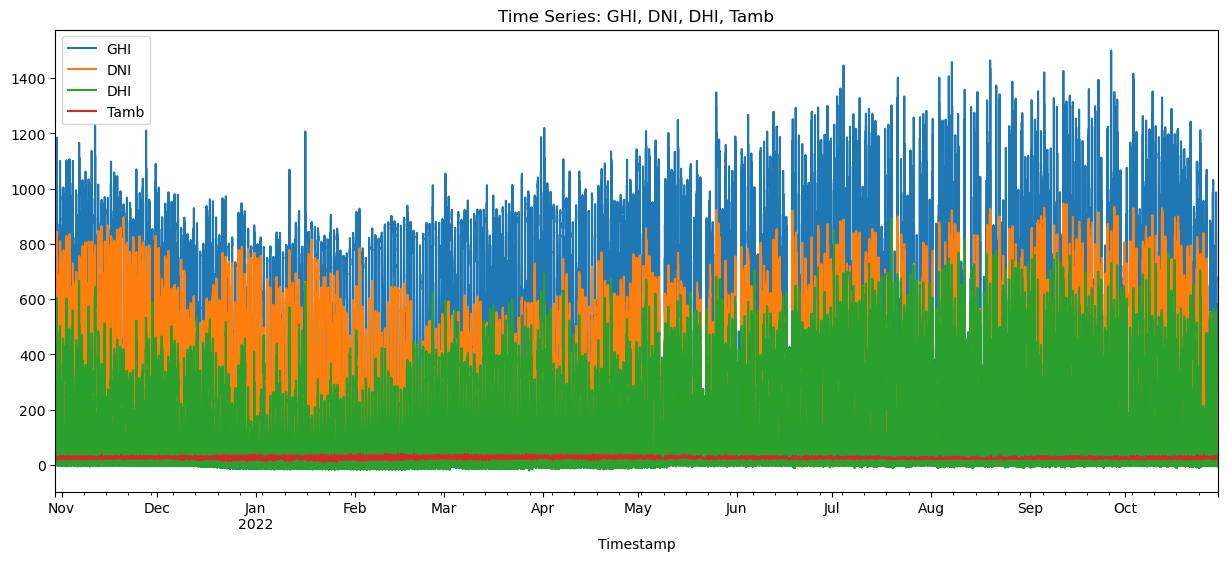

In [8]:
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
plt.show()

In [9]:
# to make plots look nicer
sns.set(style="whitegrid")

### Line Chart of Full Time Series

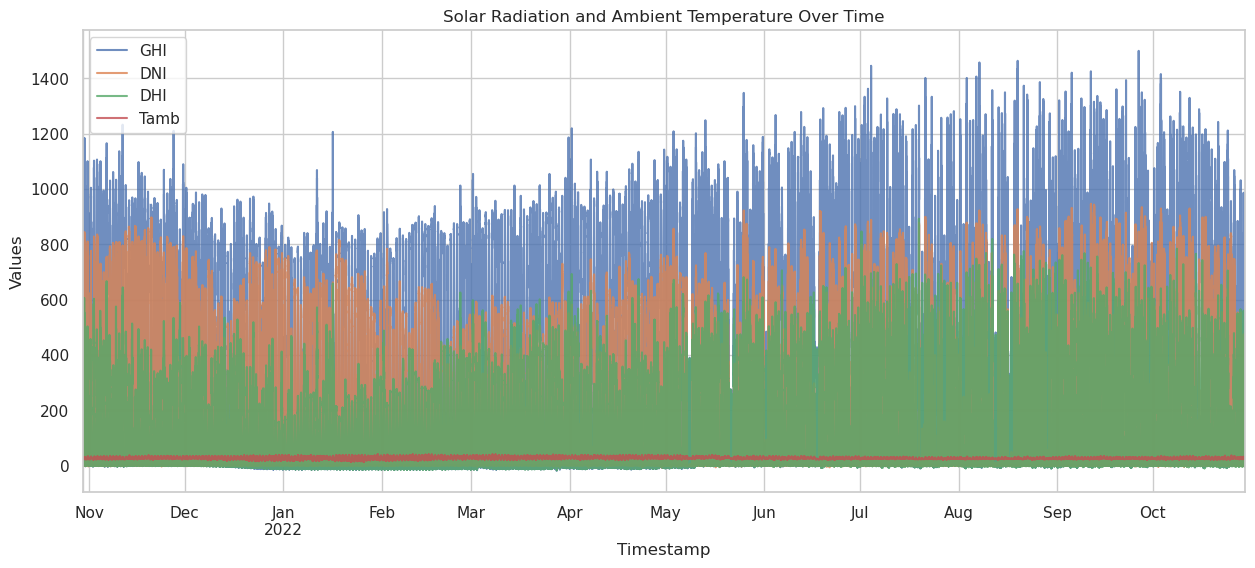

In [10]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 6), alpha=0.8)
plt.title("Solar Radiation and Ambient Temperature Over Time")
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.show()

### Monthly Pattern Overview

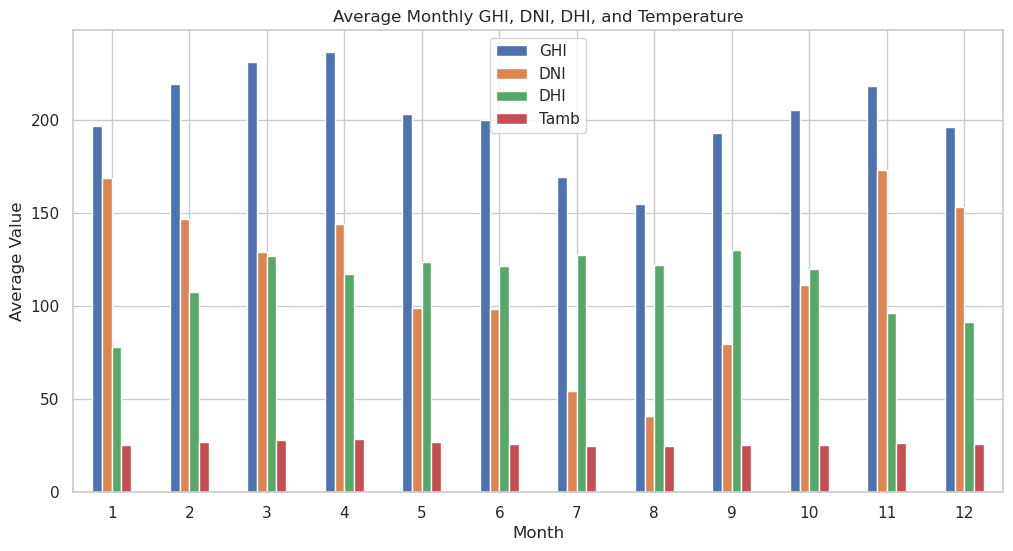

In [11]:
# Add a month column
df_clean['Month'] = df_clean.index.month

# Plot monthly average
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly GHI, DNI, DHI, and Temperature")
plt.ylabel("Average Value")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

### Daily Trend Pattern Overview

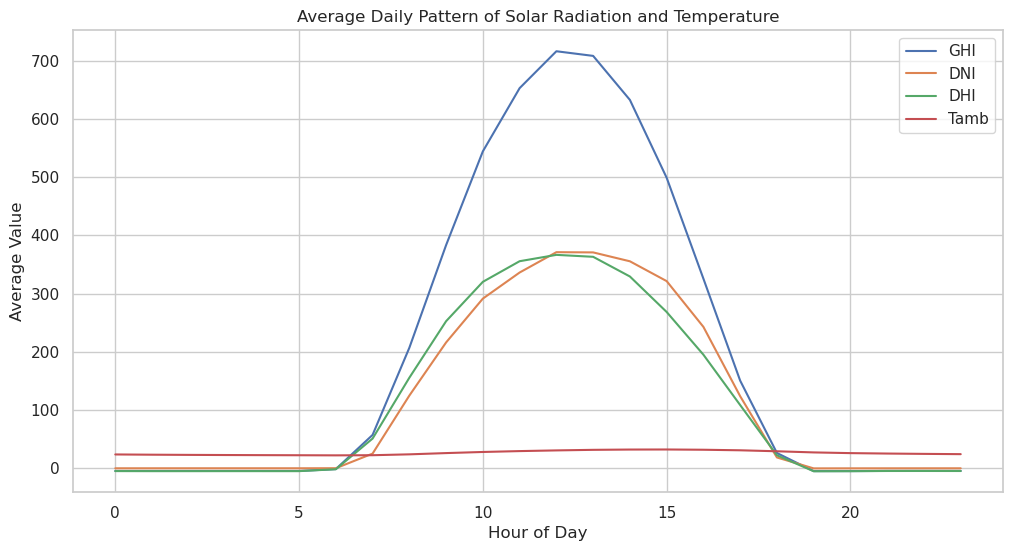

In [12]:
# Add hour column
df_clean['Hour'] = df_clean.index.hour

# Average by hour
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(12,6))
plt.title("Average Daily Pattern of Solar Radiation and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

## Cleaning Impact Analysis

In [13]:
# Check if Cleaning column is present and correctly typed
df_clean['Cleaning'] = df_clean['Cleaning'].fillna(0).astype(int)

# Group by Cleaning flag
mod_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

mod_avg.rename(columns={0: 'No Cleaning', 1: 'After Cleaning'}, inplace=True)
mod_avg


,Cleaning,ModA,ModB
0,0,206.578599,198.038150
1,1,273.309252,277.231102


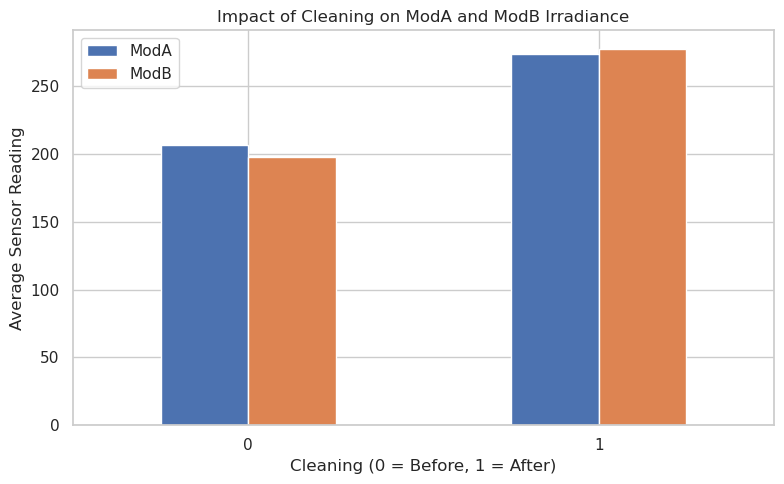

In [14]:

mod_avg.plot(
    kind='bar',
    x='Cleaning',
    figsize=(8, 5),
    title='Impact of Cleaning on ModA and ModB Irradiance',
    legend=True,
    rot=0
)

plt.xlabel("Cleaning (0 = Before, 1 = After)")
plt.ylabel("Average Sensor Reading")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation & Relationship Analysis

### Heatmap of correlations

<Axes: >

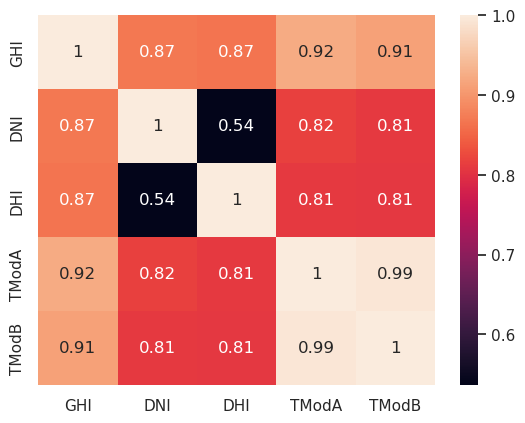

In [15]:
# Heatmap
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True)

### Scatter plots

<Axes: xlabel='WS', ylabel='GHI'>

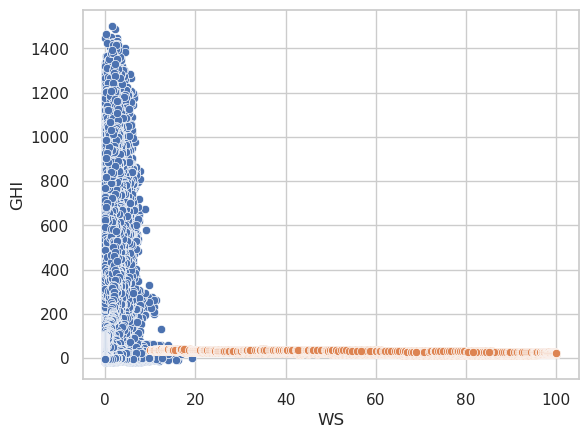

In [16]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')

<Axes: xlabel='WSgust', ylabel='GHI'>

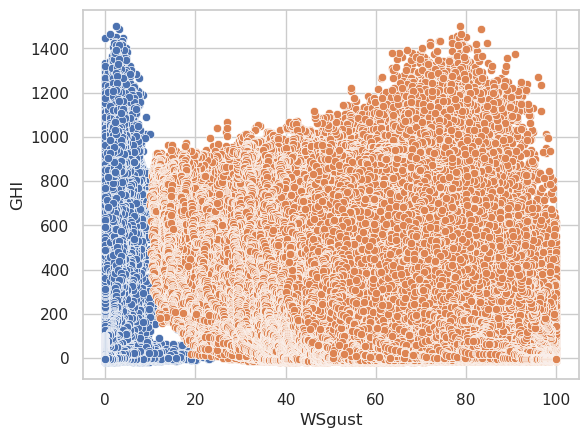

In [17]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='GHI')

<Axes: xlabel='WD', ylabel='GHI'>

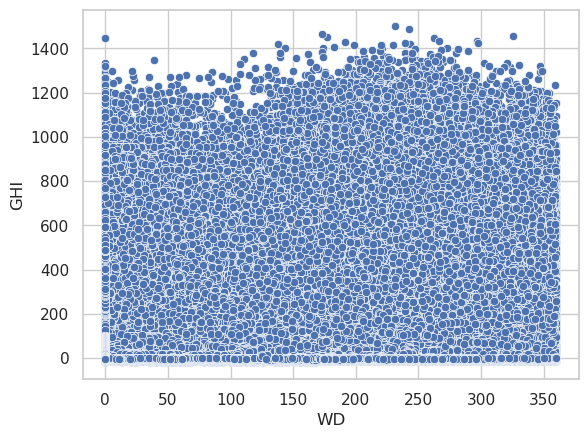

In [18]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WD', y='GHI')

## Wind & Distribution Analysis

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

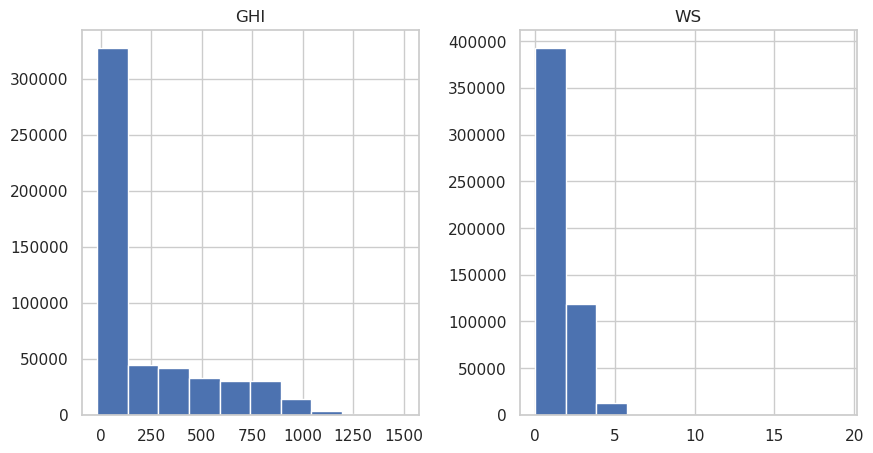

In [19]:
# Histogram of GHI and WS
df_clean[['GHI', 'WS']].hist(figsize=(10,5))

## Temperature Analysis

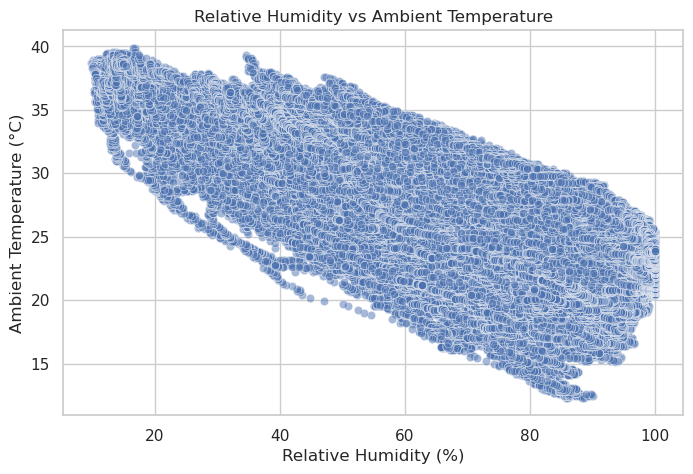

In [20]:
# Scatter Plot: RH vs Tamb
# This shows whether higher humidity correlates with cooler or warmer air temperatures.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.show()

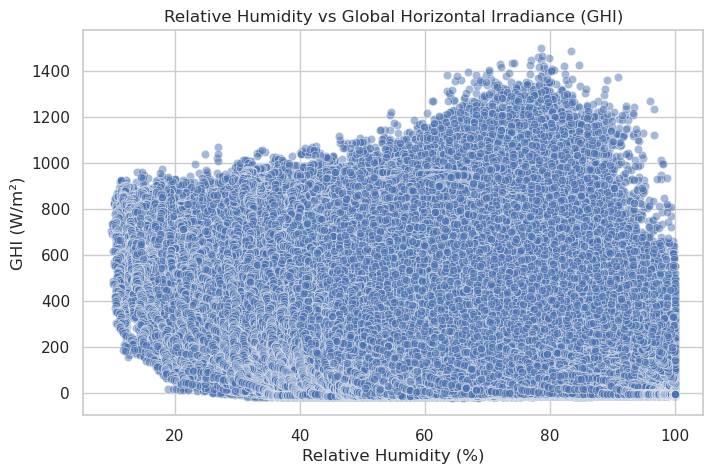

In [21]:
# Scatter Plot: RH vs GHI
# This shows if humidity influences solar irradiance. High RH could mean more cloud cover, reducing GHI.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


In [22]:
# Correlation Coefficients
#This gives a quick numerical insight into strength of relationships.

# Correlation values
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))

Correlation between RH and Tamb: -0.7919366521547273
Correlation between RH and GHI: -0.5466774606671512


A negative correlation between RH and GHI suggests high humidity blocks sunlight (common in cloud-prone regions).

A negative correlation between RH and Tamb suggests cooler temperatures in high-humidity areas.

## Bubble Chart

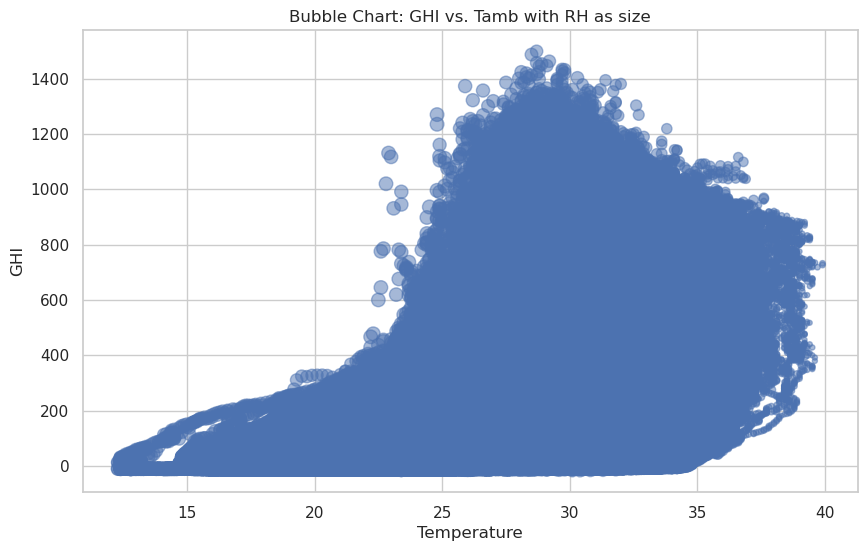

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs. Tamb with RH as size')
plt.show()